**The Data**
The data here is from Kaggle. It has a timeseries for song's list, artist from spotify along with the number of streams and its positions and zone.


**Load Data from Kaggle**

In [0]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"abhinavchatterji","key":"b00f263b7408f115794e70aa8fc0b8b7"}'}

In [0]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d edumucelli/spotifys-worldwide-daily-song-ranking
!unzip spotifys-worldwide-daily-song-ranking.zip

-rw-r--r-- 1 root root 72 Jan 16 08:29 kaggle.json
spotifys-worldwide-daily-song-ranking.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  spotifys-worldwide-daily-song-ranking.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**Exploratory analysis**

In [0]:
spotify = pd.read_csv('data.csv')

In [0]:
spotify.head(5)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


**Artists with highest number of streamings**

In [0]:
streams = spotify.groupby(['Artist']).sum()[['Streams']]

In [0]:
streams.sort_values(by = ['Streams'], ascending=False, inplace = True)

In [0]:
streams.iloc[:20,:].head(3)

,Streams
Artist,
Ed Sheeran,8913973976
Drake,4523630992
The Chainsmokers,4292590087


Text(0,0.5,'Artist')

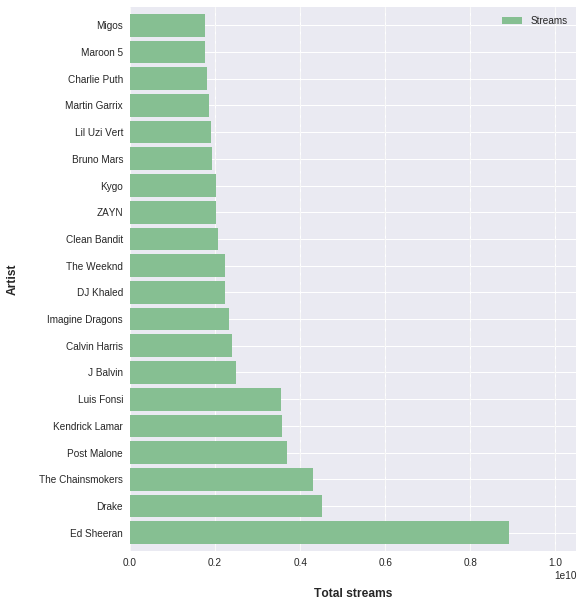

In [0]:
ax = streams.iloc[:20,:].plot(kind = 'barh',figsize=(8, 10), color='#86bf92', zorder=2, width=0.85)
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


ax.set_xlabel("Total streams", labelpad=20, weight='bold', size=12)

ax.set_ylabel("Artist", labelpad=20, weight='bold', size=12)



**Songs with maximum 1st positions**

In [0]:
most_no_one = spotify[spotify['Position'] == 1].groupby(['Track Name']).count()[['Date']]
most_no_one.sort_values(by = ['Date'], ascending=False, inplace = True)
most_no_one.columns = ['One Positions']

Text(0,0.5,'Number of time first poistion')

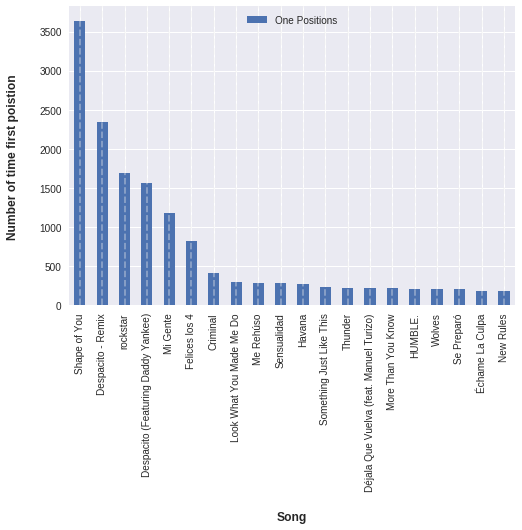

In [0]:
ax = most_no_one.iloc[:20,:].plot.bar()
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

 
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)


ax.set_xlabel("Song", labelpad=20, weight='bold', size=12)


ax.set_ylabel("Number of time first poistion", labelpad=20, weight='bold', size=12)


**Timeseries: No of streams for position 1 song during the year**

In [0]:
daily_no_one_tracks = spotify[spotify["Position"] == 1][['Track Name', 'Streams', 'Date']]
daily_no_one_tracks.Date = pd.to_datetime(daily_no_one_tracks.Date)
daily_no_one_tracks.set_index('Date', inplace = True)

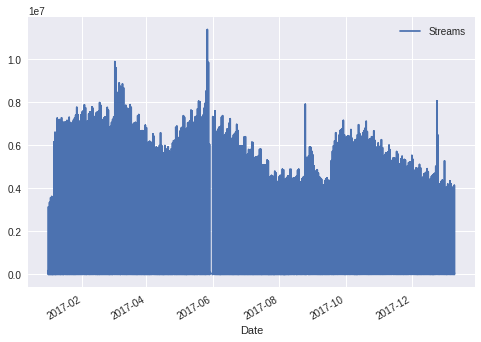

In [0]:
daily_no_one_tracks.plot()